In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Support Vector Machines (SVM)

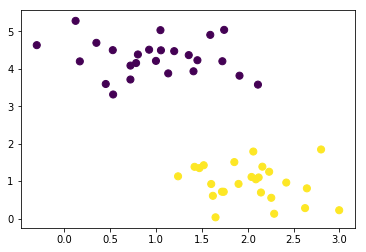

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.5)
plt.scatter(X[:,0], X[:, 1], c=y, s=50)

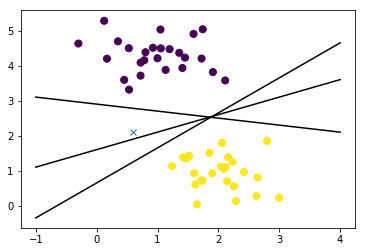

In [3]:
xfit = np.linspace(-1, 4)
plt.scatter(X[:,0], X[:, 1], c=y, s=50)
plt.plot([0.6], [2.1], 'x')
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

### Maximizing the Margin

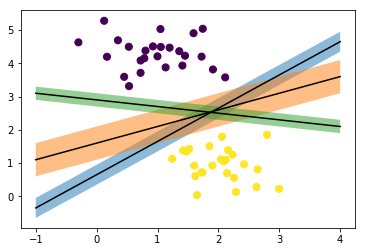

In [4]:
xfit = np.linspace(-1, 4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
for m, b, d in [(1, 0.65, 0.3), (0.5, 1.6, 0.5), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, alpha=0.5)

# Support Vector Classifier (SVC)

In [5]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
print(model)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[[0.5323772  3.31338909]
 [2.11114739 3.57660449]
 [2.06051753 1.79059891]]


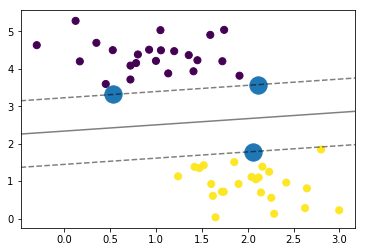

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300)
        
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(model)
print(model.support_vectors_)

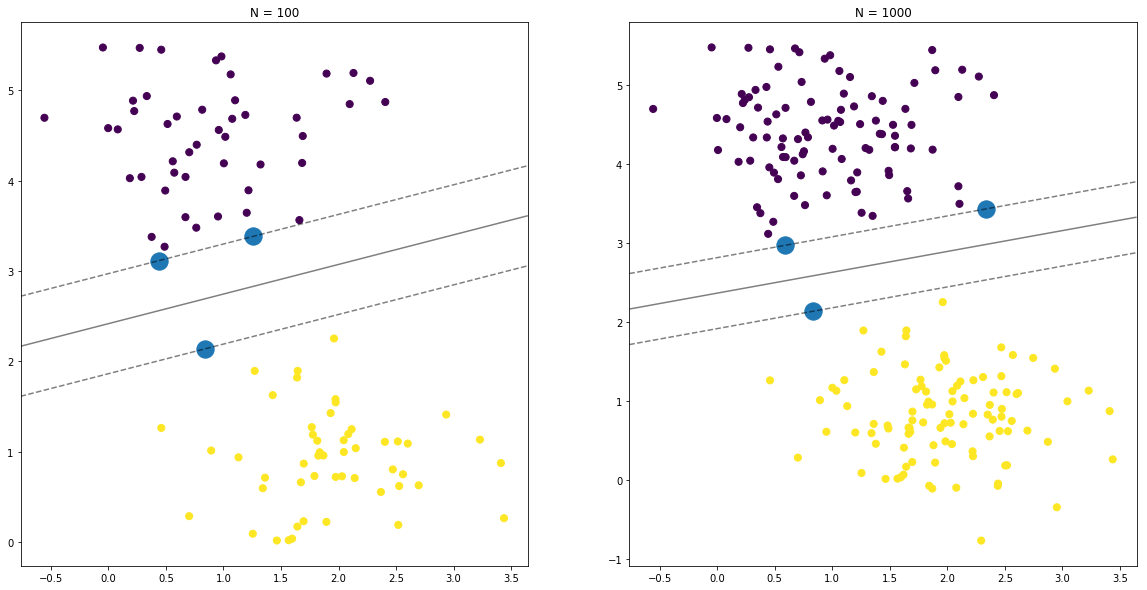

In [7]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for axi, N in zip(ax, [100, 1000]):
    plot_svm(N, axi)
    axi.set_title('N = %d' % (N))

# Kernel Support Vector Machines (Kernel SVM)

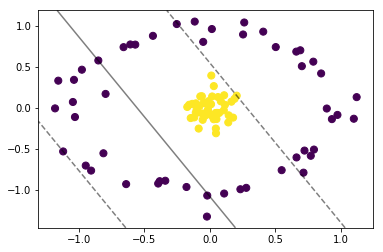

In [8]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf, plot_support=False)

### Radical Basis Function

In [9]:
r = np.exp(-(X ** 2).sum(1))
print(r)

[0.24765787 0.40995877 0.98525555 0.98958912 0.99109274 0.98640247
 0.3644592  0.17140376 0.9918985  0.97522804 0.99419545 0.38864821
 0.34629008 0.41865604 0.38090599 0.38045172 0.97079022 0.3773037
 0.51976369 0.98895141 0.35481523 0.93652852 0.97982853 0.93725083
 0.98968525 0.29302004 0.38369969 0.98012423 0.97133533 0.97858606
 0.39748522 0.27957851 0.39446167 0.38106785 0.44724494 0.97913025
 0.27929429 0.33071803 0.40622201 0.95278458 0.99565539 0.93167857
 0.99238262 0.31348315 0.98015285 0.32798651 0.32387658 0.40372037
 0.97404675 0.93033053 0.99588299 0.99945918 0.44997592 0.23478963
 0.99312279 0.99331823 0.303254   0.35269325 0.40231011 0.99339617
 0.9673406  0.38773791 0.98750424 0.98976211 0.97291753 0.4699782
 0.4148388  0.98772866 0.99514429 0.33363567 0.41126226 0.4516095
 0.90670713 0.98968707 0.95533411 0.99387168 0.24485268 0.96420593
 0.97621484 0.37331877 0.35645088 0.98524173 0.317529   0.85474152
 0.32044611 0.24821547 0.51570645 0.99278949 0.34233936 0.2152145

### Kernel Transformation

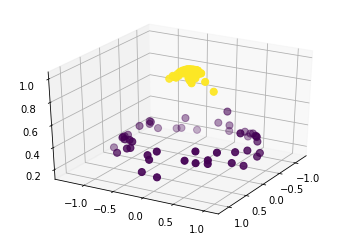

In [10]:
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50)
    ax.view_init(elev=elev, azim=azim)
plot_3D()

### Radial Basis Function (RBF)

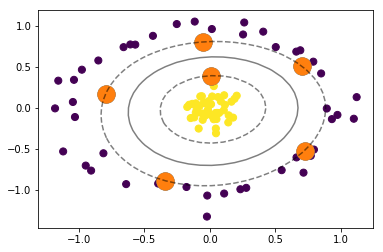

In [11]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1)

### Softening Margins

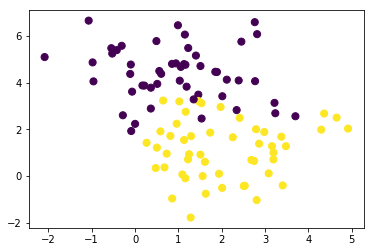

In [12]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

### Fudge Factor

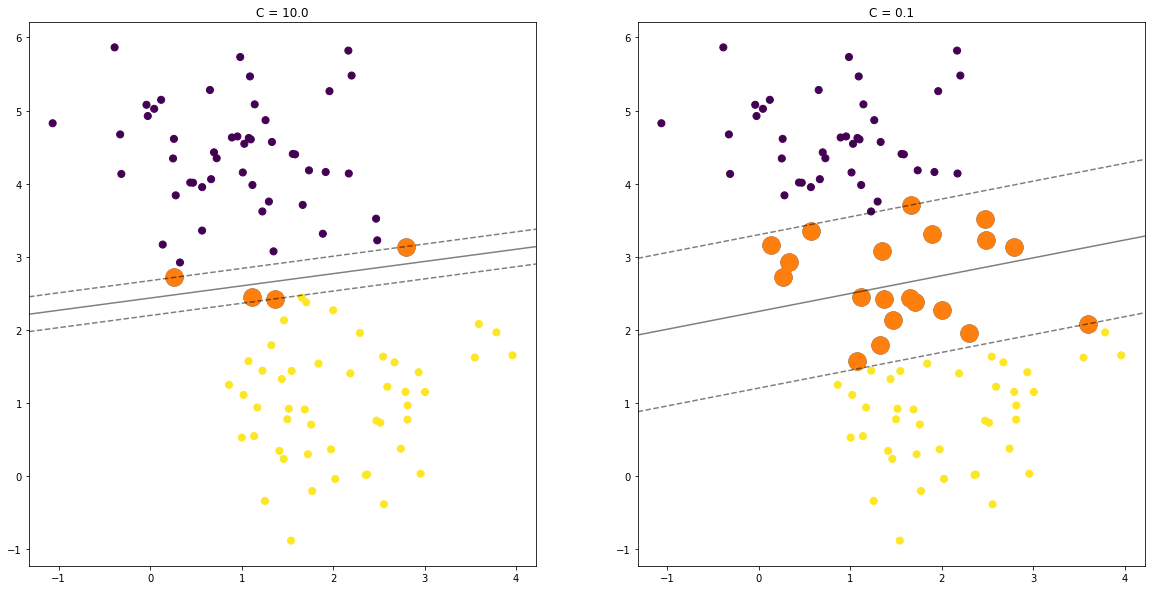

In [13]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for axi, C in zip(ax, [10, 0.1]):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1)
    axi.set_title('C = %0.1f' % (C))

# Example: Faces

In [14]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


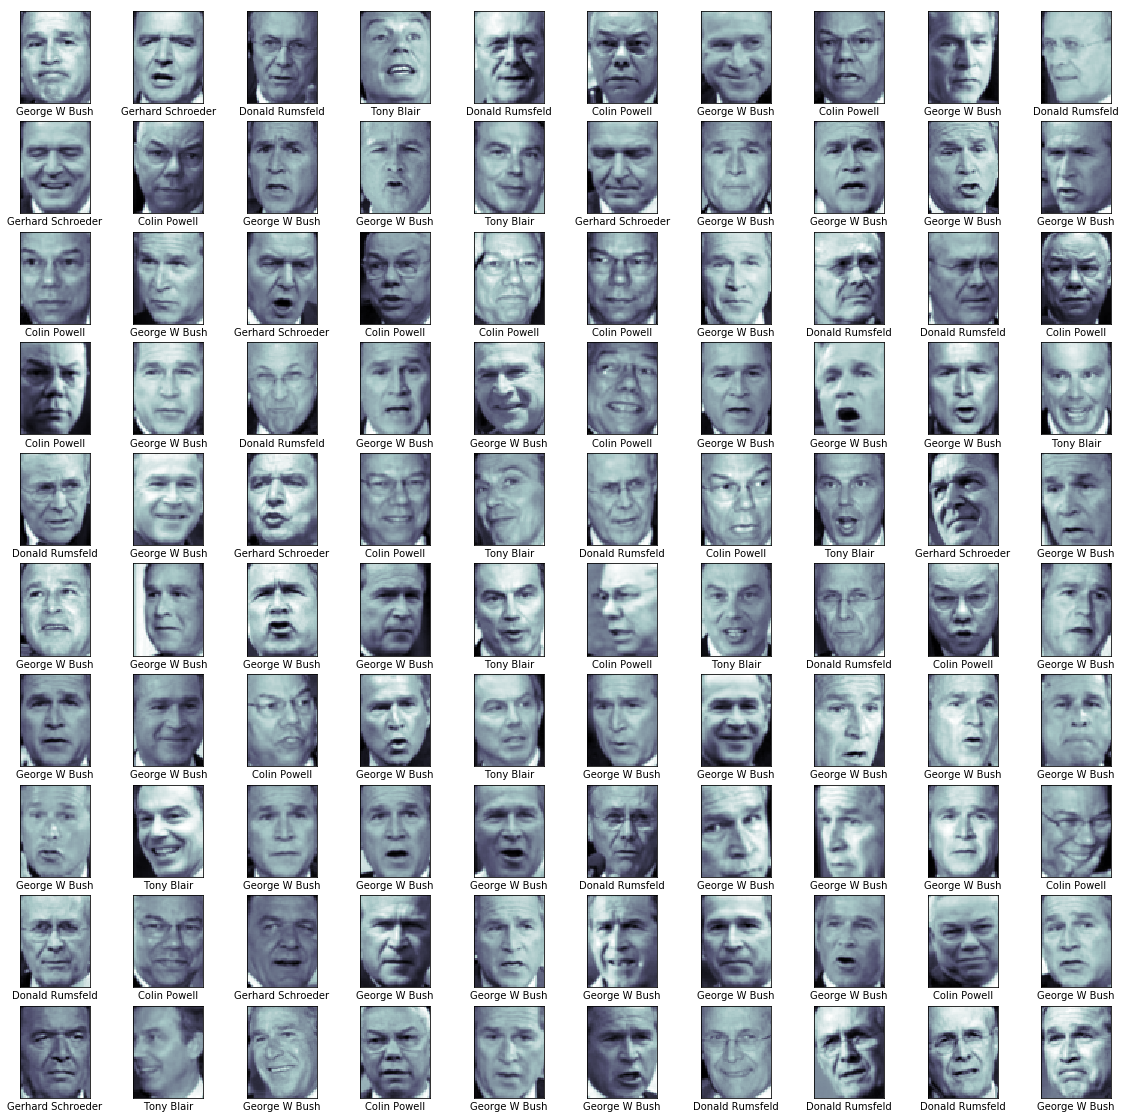

In [15]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [16]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(855, 2914)
(285, 2914)
(855,)
(285,)


/Users/DannyShau/anaconda/envs/py3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### SVC, PCA

In [17]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

### Grid Search

In [18]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 15], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/Users/DannyShau/anaconda/envs/py3.5/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


CPU times: user 25.4 s, sys: 1.6 s, total: 27 s
Wall time: 18 s
{'svc__C': 1, 'svc__gamma': 0.005}


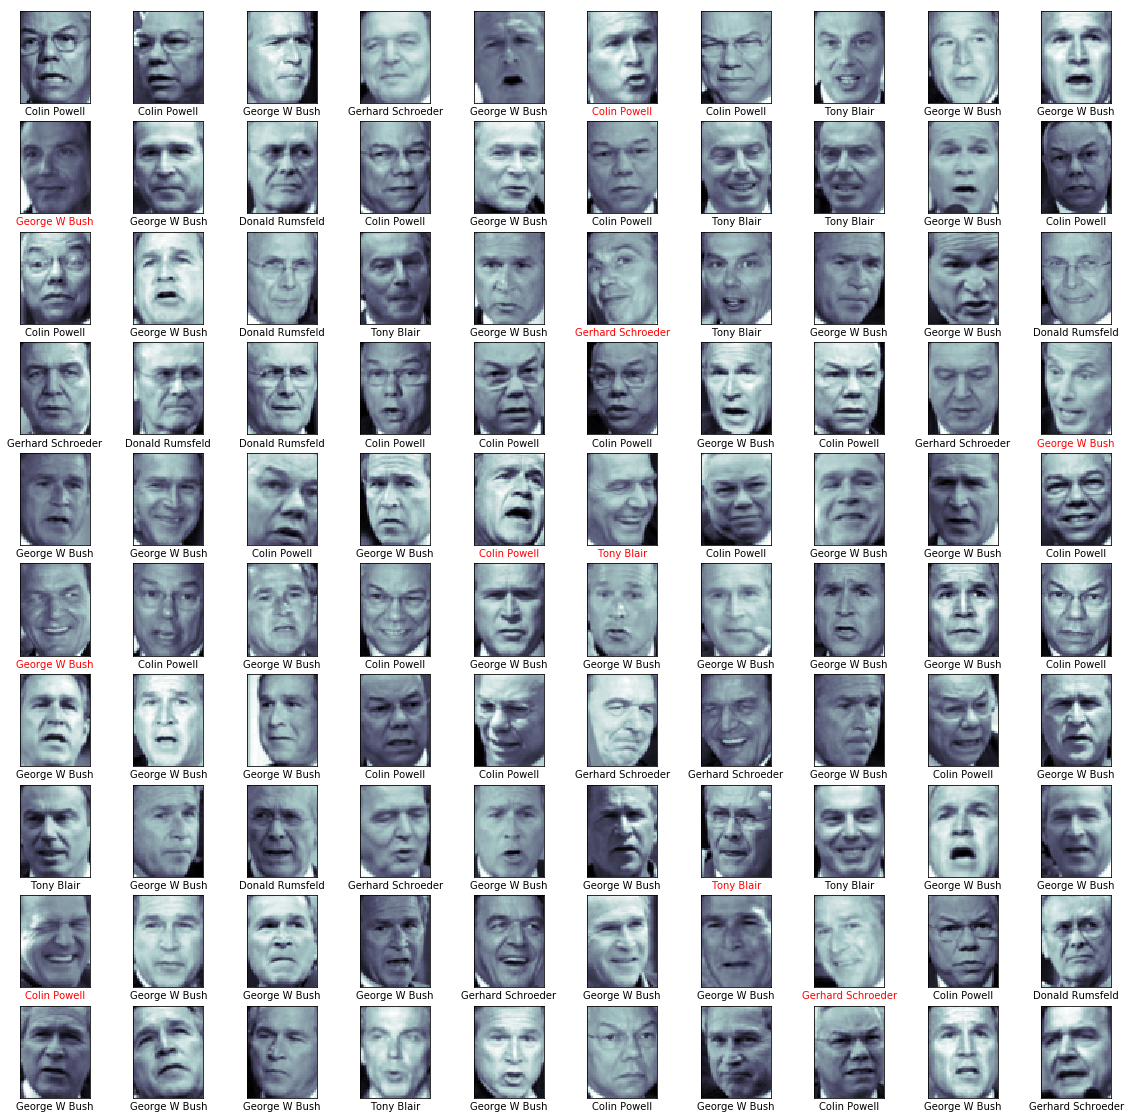

In [19]:
model = grid.best_estimator_
yfit = model.predict(Xtest)
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(faces.target_names[yfit[i]], color='black' if yfit[i] == ytest[i] else 'red')

In [20]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.86      0.97      0.91        64
  Donald Rumsfeld       0.93      0.81      0.87        32
    George W Bush       0.94      0.94      0.94       127
Gerhard Schroeder       0.86      0.83      0.84        29
       Tony Blair       0.90      0.82      0.86        33

      avg / total       0.91      0.91      0.91       285



Text(83.4,0.5,'Predict')

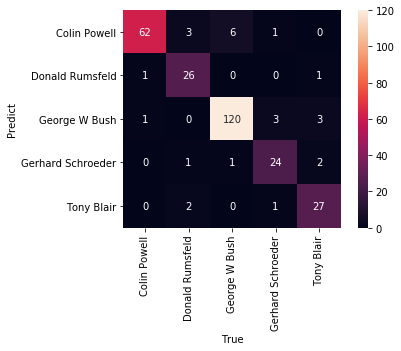

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('True')
plt.ylabel('Predict')